# Data Visualization Workshop: 2019BCのデータver.

# 現状分析

## ヒアリングによると、売上が減少しているらしい。実際にデータを見て、どれくらい売上が減少しているのだろうか？グラフを作ってみよう。

In [36]:
import pandas as pd
df = pd.read_csv('20191122_Sample_data.csv', encoding = 'utf-8')

In [37]:
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category
0,2018/9/23,1,1,65,Male,28649,Chiba,Kanto,Furniture
1,2018/1/8,2,1,45,Male,11466,Wakayama,Kansai,Commodity
2,2018/2/8,2,2,45,Male,10428,Hyogo,Kansai,Commodity
3,2018/3/7,2,3,45,Male,9510,Saitama,Kanto,Commodity
4,2018/3/10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 9 columns):
Date          773 non-null object
ID            773 non-null int64
Frequency     773 non-null int64
Age           773 non-null int64
Sex           773 non-null object
Sale          773 non-null int64
Prefecture    773 non-null object
Area          773 non-null object
Category      773 non-null object
dtypes: int64(4), object(5)
memory usage: 54.5+ KB


In [41]:
# 月ごとに集計をするため、日付から月を取り出す。（他にも良い方法あるのかな？）
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Month'] = df['Date'].dt.month
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month
0,2018-09-23,1,1,65,Male,28649,Chiba,Kanto,Furniture,9
1,2018-01-08,2,1,45,Male,11466,Wakayama,Kansai,Commodity,1
2,2018-02-08,2,2,45,Male,10428,Hyogo,Kansai,Commodity,2
3,2018-03-07,2,3,45,Male,9510,Saitama,Kanto,Commodity,3
4,2018-03-10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies,3


In [42]:
df_Sale = df.groupby('Month').sum()
df_Sale.head()

,ID,Frequency,Age,Sale
Month,,,,
1,13781,72,2742,752223
2,15333,89,2783,813704
3,14056,123,3243,875914
4,17006,144,3544,939119
5,16039,182,3393,786863


In [43]:
df_Sale['Sale'].head()

Month
1    752223
2    813704
3    875914
4    939119
5    786863
Name: Sale, dtype: int64

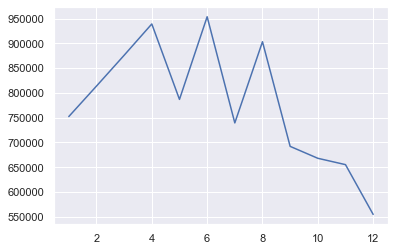

In [44]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.plot(df_Sale.index, df_Sale['Sale'])

(0, 1000000)

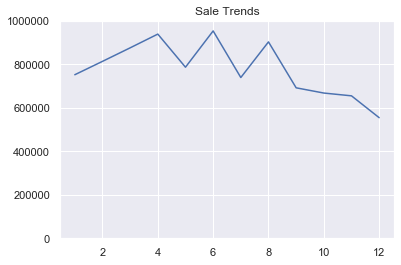

In [45]:
plt.plot(df_Sale.index, df_Sale['Sale'])
plt.title('Sale Trends')
plt.ylim(0, 1000000)

(0, 1000000)

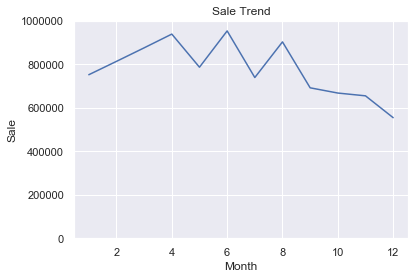

In [48]:
import seaborn as sns
import japanize_matplotlib
sns.set()

sns.lineplot(df_Sale.index, df_Sale['Sale'])
plt.title('Sale Trend')
plt.ylim(0, 1000000)

(0, 1000000)

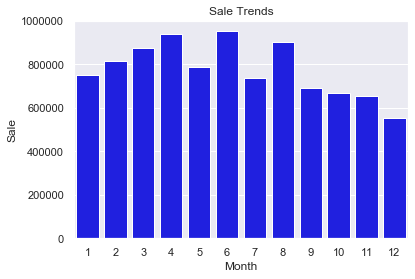

In [49]:
sns.barplot(df_Sale.index, df_Sale['Sale'], color = 'blue')
plt.title('Sale Trends')
plt.ylim(0, 1000000)

## わかったこと: 減少傾向にある。4月ころから、増減を繰り返しており、8月からは減少傾向は強まっている。

## どうして減少したのだろうか？
## 売上＝客数(購買回数)×客単価より、どちらの影響かを考えていく。※今回は1人1種類の商品しか買っていないことになっている。1レコード1ユーザー。

In [50]:
# 客単価から見ていく。客単価は売上の平均値となる。
df_purchase = df.groupby('Month').mean()
df_purchase['Sale'].head(12)

Month
1     11753.484375
2     12144.835821
3     12165.472222
4     12356.828947
5     10491.506667
6     13064.082192
7     11375.523077
8     15846.684211
9     11162.241935
10    11322.220339
11    12362.301887
12    11094.760000
Name: Sale, dtype: float64

(0, 17000)

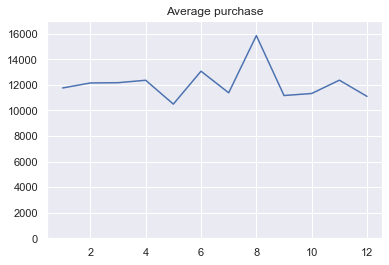

In [51]:
# プロットしてみよう。8月に急激に伸びている。それ以外の時期では、12000円付近になっている。

plt.plot(df_purchase.index, df_purchase['Sale'])
plt.title('Average purchase')
plt.ylim(0, 17000)

In [52]:
# 客数＝購買回数はどうだろうか？
df_trans = df.groupby('Month').count()
df_trans['ID'].head(12)

Month
1     64
2     67
3     72
4     76
5     75
6     73
7     65
8     57
9     62
10    59
11    53
12    50
Name: ID, dtype: int64

(0, 80)

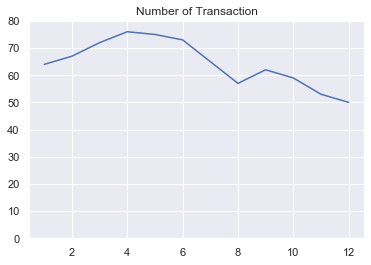

In [53]:
plt.plot(df_trans.index, df_trans['ID'])
plt.title('Number of Transaction')
plt.ylim(0, 80)

## 売上の減少と購入者の減少の様子が似ている⇒客単価よりも、購入者数の減少が売上減少の原因として大きいのではないか？（方向性を立てる。）

# 課題定義

## 購入者減少の要因を掴みたい。仮説を立てるために、購入者はどんな人なのか？データから観測される範囲で購入者の特徴を捉えてみよう！

## 流れ➀　デモグラフィックな観点から考える。

### そもそもどんなお客さんがいるのか？年齢層を見てみる。

In [57]:
# 年代ごとにカウントしていきたい。なので、年齢を年代に直す作業を行う。ex. 45→40
df['Ages'] = df['Age']//10*10

In [58]:
# ユニークなIDを数える
df_ages = df.groupby('Ages').nunique()
df_ages

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month,Ages
Ages,,,,,,,,,,,
20,94,72,13,10,2,118,39,8,3,12,1
30,133,79,8,9,2,169,42,8,3,12,1
40,126,91,8,10,2,167,44,8,3,12,1
50,140,85,12,10,2,178,42,8,3,12,1
60,105,62,7,9,2,132,41,8,3,12,1


Text(0.5, 1.0, 'Ages')

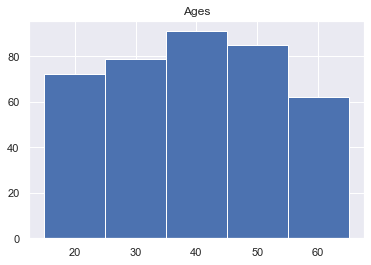

In [59]:
plt.bar(df_ages.index, df_ages['ID'], width = 10)
plt.title('Ages')

### 性別を見てみる。

In [60]:
# 性別を比較する。
df_sex = df.groupby('Sex').nunique()
df_sex

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month,Ages
Sex,,,,,,,,,,,
Female,148,113,14,41,1,190,43,8,3,12,5
Male,285,275,12,47,1,574,45,8,3,12,5


<BarContainer object of 2 artists>

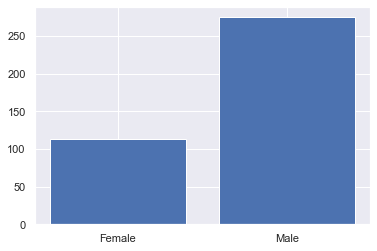

In [61]:
# 日本語対応させなきゃ。
plt.bar(df_sex.index, df_sex['ID'])

## 性別×年代でクロス集計

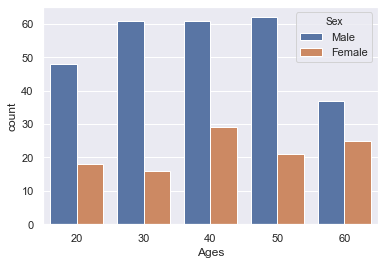

In [84]:
# IDのダブリをなくせばすぐに出来る。
df_sex_age = df.drop_duplicates(subset = ['ID'], keep = 'last')
sns.countplot(x = df_sex_age['Ages'], hue = df_sex_age['Sex'])

## 仮説：男性の方が多いから、男性が減ったのでしょうか？

In [63]:
# もっとスマートなやり方があるはず！
df_man = df[df['Sex'] == 'Male']
df_female = df[df['Sex'] == 'Female']

In [64]:
df_man_1 = df_man.groupby('Month').nunique()
df_female_1 = df_female.groupby('Month').nunique()

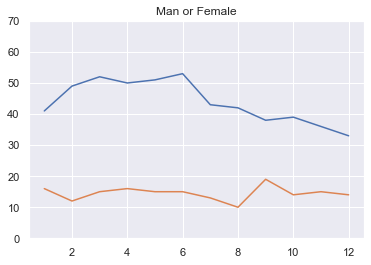

In [67]:
plt.title('Man or Female')
plt.ylim(0, 70)
plt.plot(df_man_1.index, df_man_1['ID'])
plt.plot(df_female_1.index, df_female_1['ID'])

## 男性の減少が顕著ですね。男性とはいっても、どんな男性が減少したのでしょうか？

In [68]:
# これももっとスマートなやり方があるはず！
dummys = pd.get_dummies(df_man['Ages'])
df_man_new = pd.concat([df_man, dummys], axis = 1)
df_man_ages = df_man_new.groupby('Month').sum()

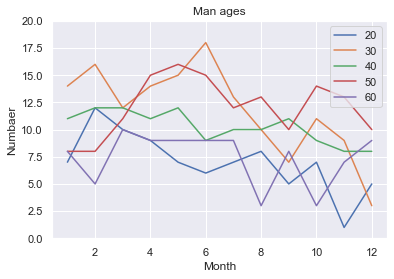

In [69]:

ages = [20, 30, 40, 50, 60]
for i in ages:
    plt.plot(df_man_ages.index, df_man_ages[i], label = i)
    
plt.title('Man ages')
plt.ylim(0, 20)
plt.xlabel('Month')
plt.ylabel('Numbaer')
plt.legend()

## 基本的にどの年齢層も減少傾向にあるが、20, 30代の減少がかなり顕著である。（結構雑なデータかもしれないですね。）

## それぞれの年齢層がどうして減少しているのかを、持っているデータに縛られずに考える。

## 流れ➁　購買頻度の問題？

## 購買頻度を可視化してみる。

In [87]:
# IDでグループかつ、最大値を考えることで、個人の購買頻度がデータに含まれる。
df_Freq = df.groupby('ID').max()
df_Freq.head()

,Date,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month,Ages,New
ID,,,,,,,,,,,
1,2018-09-23,1,65,Male,28649,Chiba,Kanto,Furniture,9,60,1.0
2,2018-09-23,8,45,Male,24254,Wakayama,Tyubu,Office Supplies,9,40,1.0
3,2018-11-29,1,49,Male,105,Kagoshima,Kyusyuu,Office Supplies,11,40,1.0
4,2018-03-04,1,49,Male,561,Nara,Kansai,Office Supplies,3,40,1.0
5,2018-07-20,6,69,Male,28246,Tochigi,Tyubu,Office Supplies,7,60,1.0


Text(0.5, 1.0, 'Frequency')

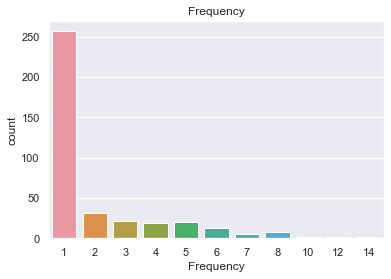

In [91]:
# 圧倒的に1回で終わっている人が多い。
sns.countplot(df_Freq['Frequency'])
plt.title('Frequency')

In [74]:
# 新規を示すダミー変数を作る。その月に初めて購買した人。
for i in range (len(df)):
    if df.loc[i, 'Frequency'] == 1:
        df.loc[i, 'New'] = 1
    else:
        df.loc[i, 'New'] = 0

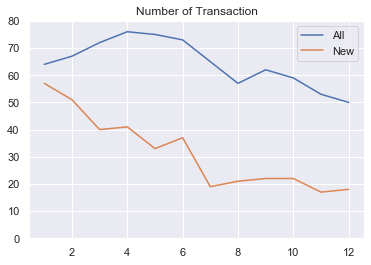

In [75]:
# １月に両者の値が一致しないのは、1月に2回以上購入した人がいるからである。
df_new_visit = df.groupby('Month').sum()

plt.plot(df_trans.index, df_trans['ID'], label = 'All')
plt.plot(df_new_visit.index , df_new_visit['New'], label = 'New')
plt.title('Number of Transaction')
plt.ylim(0, 80)
plt.legend()

## 新規の流入は段々と減っているのは事実。どうして、新規の流入が減っているのだろうか？どうすれば、新規の流入を回復させることが出来るか？